In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import yfinance as yf
import gym
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
starbucks = yf.Ticker('SBUX')

df = starbucks.history(period="max")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


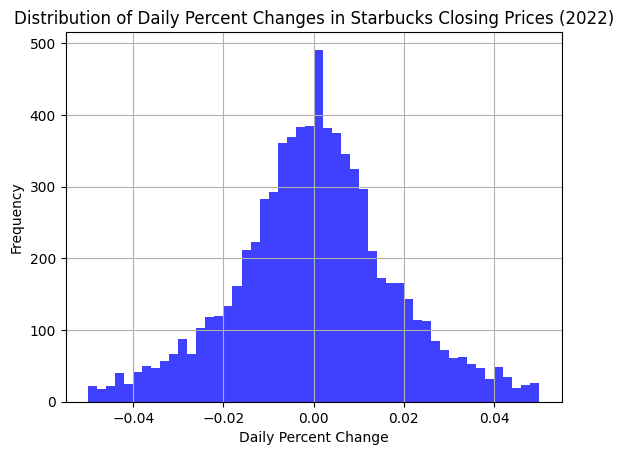

In [ ]:
# Calculating the daily percent change in closing prices
daily_returns = df['Close'].pct_change().dropna()

# Plotting the distribution of daily returns
plt.hist(daily_returns, bins=50, alpha=0.75, color='blue', range=[-0.05, 0.05])
plt.title('Distribution of Daily Percent Changes in Starbucks Closing Prices (2022)')
plt.xlabel('Daily Percent Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1992-06-26 00:00:00-04:00,0.258116,0.273479,0.251970,0.264262,224358400,0.0,0.0
1992-06-29 00:00:00-04:00,0.267334,0.288844,0.261188,0.282698,58732800,0.0,0.0
1992-06-30 00:00:00-04:00,0.288844,0.291917,0.270407,0.273479,34777600,0.0,0.0
1992-07-01 00:00:00-04:00,0.276553,0.282698,0.267334,0.279626,18316800,0.0,0.0
1992-07-02 00:00:00-04:00,0.282698,0.282698,0.273480,0.279626,13996800,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-27 00:00:00-05:00,102.290001,103.089996,102.070000,102.360001,7853600,0.0,0.0
2023-11-28 00:00:00-05:00,101.959999,102.050003,100.889999,101.180000,6848100,0.0,0.0
2023-11-29 00:00:00-05:00,101.510002,101.690002,99.529999,99.849998,8428500,0.0,0.0


In [ ]:
df.reset_index(drop = True, inplace=True)
df = df[["Open","High","Low", "Close", "Volume"]]
df = df.iloc[-7900:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
# Convert scaled data back to DataFrame for easy handling
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Assuming df is your original DataFrame
scaler.fit(df.values)  # Convert DataFrame to NumPy array before fitting


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MinMaxScaler()

In [ ]:
df_scaled

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume
0,0.000386,0.000360,0.000416,0.000386,0.016077
1,0.000386,0.000385,0.000442,0.000438,0.015211
2,0.000386,0.000437,0.000468,0.000464,0.009501
3,0.000489,0.000540,0.000572,0.000528,0.016997
4,0.000566,0.000540,0.000468,0.000412,0.028263
...,...,...,...,...,...
7895,0.854622,0.859678,0.861492,0.855345,0.010873
7896,0.851857,0.850980,0.851505,0.845456,0.009151
7897,0.848087,0.847969,0.839995,0.834310,0.011857
7898,0.835937,0.834838,0.830600,0.829701,0.017018


In [ ]:
train_data = df_scaled.iloc[:int((.8*len(df_scaled)))]
test_data = df_scaled.iloc[int(-(.2*len(df_scaled))):]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train_data

,Open,High,Low,Close,Volume
0,0.000386,0.000360,0.000416,0.000386,0.016077
1,0.000386,0.000385,0.000442,0.000438,0.015211
2,0.000386,0.000437,0.000468,0.000464,0.009501
3,0.000489,0.000540,0.000572,0.000528,0.016997
4,0.000566,0.000540,0.000468,0.000412,0.028263
...,...,...,...,...,...
6315,0.390232,0.394314,0.394201,0.392064,0.010553
6316,0.390674,0.393284,0.392265,0.388671,0.010184
6317,0.387725,0.388206,0.389211,0.386164,0.015182
6318,0.389347,0.391371,0.390849,0.389483,0.019262


In [ ]:
test_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume
6320,0.395393,0.395639,0.397180,0.396341,0.017696
6321,0.397605,0.398215,0.398074,0.395308,0.012350
6322,0.400259,0.399981,0.401202,0.398406,0.012152
6323,0.399670,0.399172,0.399936,0.398701,0.008801
6324,0.395983,0.397038,0.399787,0.396488,0.008062
...,...,...,...,...,...
7895,0.854622,0.859678,0.861492,0.855345,0.010873
7896,0.851857,0.850980,0.851505,0.845456,0.009151
7897,0.848087,0.847969,0.839995,0.834310,0.011857
7898,0.835937,0.834838,0.830600,0.829701,0.017018


Now it's defining the gym environment time... epic


In [ ]:
class StockPredictionEnv(gym.Env):
    def __init__(self, df, price_intervals):
        super(StockPredictionEnv, self).__init__()
        self.df = df
        self.price_intervals = price_intervals  # List of price change intervals
        self.action_space = gym.spaces.Discrete(len(price_intervals))  # One action for each interval
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(self.df.shape[1],), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        self.done = False
        return self._get_observation()

    def _get_observation(self):
        if self.current_step < len(self.df):
            observation = self.df.iloc[self.current_step].values
            return observation
        else:
            return np.zeros(self.df.shape[1])

    def _interpret_action_as_price(self, action):
        # Map the action to the corresponding price interval
        return self.price_intervals[action]

    def _calculate_price_change(self):
        current_price = self.df.iloc[self.current_step]['Close']
        next_price = self.df.iloc[self.current_step + 1]['Close'] if self.current_step + 1 < len(self.df) else current_price
        return (next_price - current_price) / current_price  # Calculate percentage change

    def step(self, action):
        # Predicted interval based on action
        predicted_interval = self._interpret_action_as_price(action)

        # Calculate actual price change as a percentage
        actual_change = self._calculate_price_change()

        # Check if actual change falls within the predicted interval
        reward = 1 if predicted_interval[0] <= actual_change <= predicted_interval[1] else -1

        # Increment step and check if done
        self.current_step += 1
        self.done = self.current_step >= len(self.df) - 1

        new_state = self._get_observation()
        return new_state, reward, self.done, {}

**sexy** *model time*

In [ ]:
price_intervals = [(-0.1,-0.075), (-0.075, -0.05), (-0.05, -0.025), (-0.025, -0.01), (-0.01, -0.005), (-0.005, 0), (0, 0.005), (0.005, 0.01), (0.01, 0.025), (0.025, 0.05), (0.05, 0.075), (0.075, 0.1)]

env = StockPredictionEnv(df, price_intervals)

num_features = env.observation_space.shape[0]

# model = Sequential([
#     GRU(50, activation='tanh', input_shape=(1, num_features)),
#     Dense(24, activation='relu'),
#     Dense(env.action_space.n, activation='linear')  # Output layer size = number of actions
# ])

# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='mean_squared_error')


Let's choose a RL ALGORITHM -- DQN !!

***

In [ ]:
pip install stable-baselines3

In [ ]:
!pip install 'shimmy>=0.2.1'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check if a GPU is available and print GPU information
if tf.test.gpu_device_name():
    print("GPU is available.")
    print("GPU Name: ", tf.test.gpu_device_name())
else:
    print("No GPU available. Using CPU.")

GPU is available.
GPU Name:  /device:GPU:0


In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback

model = DQN("MlpPolicy", env, verbose=1,
            exploration_initial_eps=1.0,  # start with 100% exploration
            exploration_final_eps=0.1,    # reduce to 10% exploration
            exploration_fraction=0.1)     # over the first 10% of the training

# Create the callback: evaluates the model every 1000 steps
eval_callback = EvalCallback(env, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=1000,
                             deterministic=True, render=False)

# Include the callback in the learning process
model.learn(total_timesteps=10000, callback=eval_callback)

total_rewards = []
for episode in range(50):
    obs = env.reset()
    episode_reward = 0
    done = False
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        episode_reward += reward
    total_rewards.append(episode_reward)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000, episode_reward=-7621.00 +/- 0.00
Episode length: 7899.00 +/- 0.00
-----------------------------------
| eval/               |           |
|    mean_ep_length   | 7.9e+03   |
|    mean_reward      | -7.62e+03 |
| rollout/            |           |
|    exploration_rate | 0.101     |
| time/               |           |
|    total_timesteps  | 1000      |
-----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-7621.00 +/- 0.00
Episode length: 7899.00 +/- 0.00
-----------------------------------
| eval/               |           |
|    mean_ep_length   | 7.9e+03   |
|    mean_reward      | -7.62e+03 |
| rollout/            |           |
|    exploration_rate | 0.1       |
| time/               |           |
|    total_timesteps  | 2000      |
-----------------------------------
Eval num_timesteps=3000, episode_reward=-7621.00 +/- 0.00
Episode length: 7899.00 +/- 0.00
-----------------------------------
| eval/              